In [46]:
#load libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import load_dataset

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [47]:
# print out in lib libraries dataset names
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [48]:
#create dataset from diamonds
diamonds = load_dataset(name="diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [49]:
#data set information
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [50]:
#statistical descriptions 
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


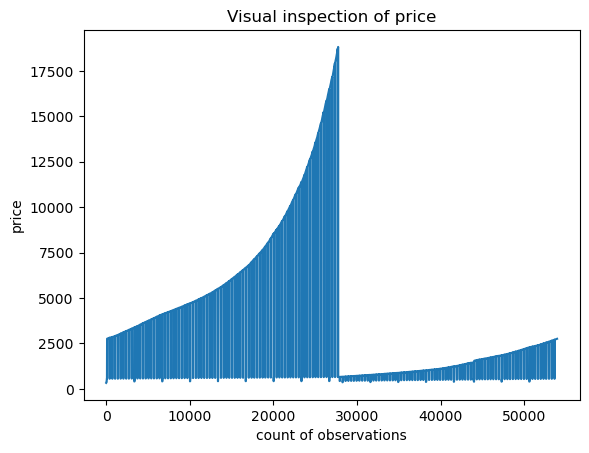

In [51]:
#quick look at price plotted 
diamonds['price'].plot(
    title='Visual inspection of price',
    xlabel='count of observations',
    ylabel='price'
);

Linear relationship between response and independent 

<function matplotlib.pyplot.show(close=None, block=None)>

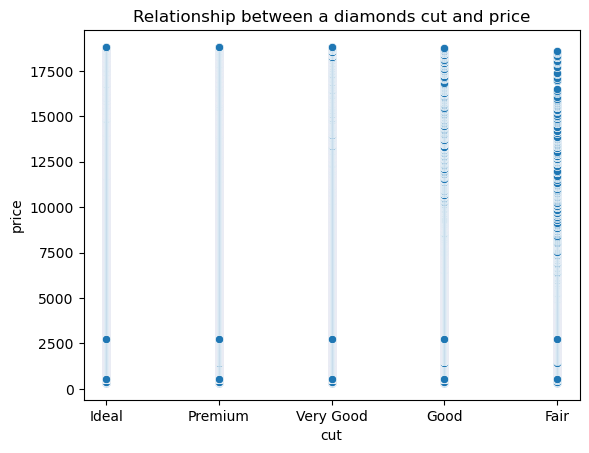

In [52]:
sns.scatterplot(x ='cut',
                y='price',
                data=diamonds)
plt.title('Relationship between a diamonds cut and price')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

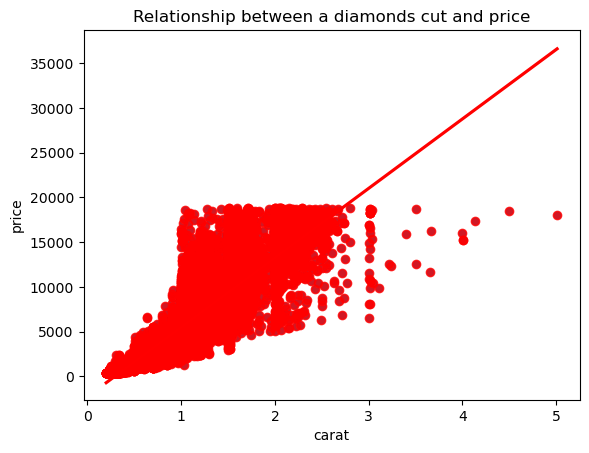

In [53]:
sns.scatterplot(x ='carat',
                y='price',
                data=diamonds , )
sns.regplot(x='carat',y='price', data=diamonds, color = 'red')
plt.title('Relationship between a diamonds cut and price')
plt.show



In [59]:


# Multi-collinearity using VIF

neededColumns = list(diamonds.describe(exclude=['category']).columns)

vifDataFrame = pd.DataFrame()
vifDataFrame['features'] = neededColumns

# Calculate VIF score for each feature
vifDataFrame['scores'] = [VIF(diamonds[neededColumns].values, i) for i in range(len(neededColumns))]

# Display the VIF DataFrame
vifDataFrame



,features,scores
0,carat,103.726117
1,depth,516.456375
2,table,501.097896
3,price,13.464526
4,x,1288.946580
5,y,531.485870
6,z,543.235912
